In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/retail_store_inventory.csv')
df.head(3)

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
1,2022-01-01,S001,P0002,Toys,South,204,150,66,144.04,63.01,20,Sunny,0,66.16,Autumn
2,2022-01-01,S001,P0003,Toys,West,102,65,51,74.02,27.99,10,Sunny,1,31.32,Summer


In [ ]:
df.isnull().sum()

,0
Date,0
Store ID,0
Product ID,0
Category,0
Region,0
Inventory Level,0
Units Sold,0
Units Ordered,0
Demand Forecast,0
Price,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73100 entries, 0 to 73099
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                73100 non-null  object 
 1   Store ID            73100 non-null  object 
 2   Product ID          73100 non-null  object 
 3   Category            73100 non-null  object 
 4   Region              73100 non-null  object 
 5   Inventory Level     73100 non-null  int64  
 6   Units Sold          73100 non-null  int64  
 7   Units Ordered       73100 non-null  int64  
 8   Demand Forecast     73100 non-null  float64
 9   Price               73100 non-null  float64
 10  Discount            73100 non-null  int64  
 11  Weather Condition   73100 non-null  object 
 12  Holiday/Promotion   73100 non-null  int64  
 13  Competitor Pricing  73100 non-null  float64
 14  Seasonality         73100 non-null  object 
dtypes: float64(3), int64(5), object(7)
memory usage: 8.4+

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df=df.sort_values(by='Date')

In [ ]:
df

,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
72,2022-01-01,S004,P0013,Furniture,East,191,56,65,54.47,61.81,0,Sunny,0,63.92,Autumn
71,2022-01-01,S004,P0012,Electronics,North,349,9,165,0.95,14.25,5,Rainy,1,18.56,Spring
70,2022-01-01,S004,P0011,Electronics,West,205,46,27,46.65,54.84,0,Sunny,1,57.76,Spring
69,2022-01-01,S004,P0010,Groceries,East,447,104,96,115.03,33.48,15,Cloudy,0,37.15,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73027,2024-01-01,S002,P0008,Furniture,North,218,43,144,51.52,90.38,10,Sunny,0,94.87,Autumn
73026,2024-01-01,S002,P0007,Toys,West,53,2,40,-6.08,63.66,20,Snowy,1,62.37,Autumn
73025,2024-01-01,S002,P0006,Toys,East,160,159,78,151.48,19.06,20,Rainy,1,15.59,Autumn
73035,2024-01-01,S002,P0016,Toys,North,258,110,197,107.61,41.30,5,Cloudy,0,44.96,Autumn


In [ ]:
# Pick one store and one product
store_id = df["Store ID"].unique()[0]
product_id = df["Product ID"].unique()[0]

filtered_df = df[
    (df["Store ID"] == store_id) &
    (df["Product ID"] == product_id)
]

filtered_df


,Date,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
0,2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
100,2022-01-02,S001,P0001,Groceries,West,116,81,104,92.94,27.95,10,Cloudy,0,30.89,Spring
200,2022-01-03,S001,P0001,Electronics,West,154,5,189,5.36,62.70,20,Rainy,0,58.22,Winter
300,2022-01-04,S001,P0001,Groceries,South,85,58,193,52.87,77.88,15,Cloudy,1,75.99,Winter
400,2022-01-05,S001,P0001,Groceries,South,238,147,37,150.27,28.46,20,Sunny,1,29.40,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72600,2023-12-28,S001,P0001,Groceries,North,104,67,64,78.15,77.61,0,Cloudy,1,78.00,Spring
72700,2023-12-29,S001,P0001,Toys,West,224,168,35,184.45,14.01,15,Snowy,1,18.51,Summer
72800,2023-12-30,S001,P0001,Furniture,North,208,30,167,20.66,57.00,10,Cloudy,0,54.92,Winter
72900,2023-12-31,S001,P0001,Clothing,West,135,26,54,42.53,12.17,0,Snowy,0,14.83,Winter


In [ ]:
filtered_df = filtered_df.set_index("Date")
filtered_df


,Store ID,Product ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality
Date,,,,,,,,,,,,,,
2022-01-01,S001,P0001,Groceries,North,231,127,55,135.47,33.50,20,Rainy,0,29.69,Autumn
2022-01-02,S001,P0001,Groceries,West,116,81,104,92.94,27.95,10,Cloudy,0,30.89,Spring
2022-01-03,S001,P0001,Electronics,West,154,5,189,5.36,62.70,20,Rainy,0,58.22,Winter
2022-01-04,S001,P0001,Groceries,South,85,58,193,52.87,77.88,15,Cloudy,1,75.99,Winter
2022-01-05,S001,P0001,Groceries,South,238,147,37,150.27,28.46,20,Sunny,1,29.40,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,S001,P0001,Groceries,North,104,67,64,78.15,77.61,0,Cloudy,1,78.00,Spring
2023-12-29,S001,P0001,Toys,West,224,168,35,184.45,14.01,15,Snowy,1,18.51,Summer
2023-12-30,S001,P0001,Furniture,North,208,30,167,20.66,57.00,10,Cloudy,0,54.92,Winter


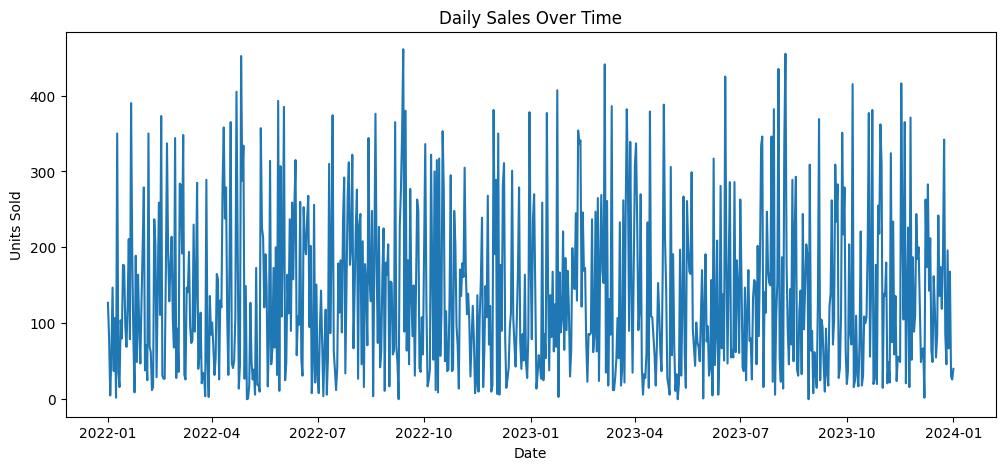

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(filtered_df.index, filtered_df["Units Sold"])
plt.title("Daily Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()


In [ ]:
df.columns


Index(['Date', 'Store ID', 'Product ID', 'Category', 'Region',
       'Inventory Level', 'Units Sold', 'Units Ordered', 'Demand Forecast',
       'Price', 'Discount', 'Weather Condition', 'Holiday/Promotion',
       'Competitor Pricing', 'Seasonality'],
      dtype='object')

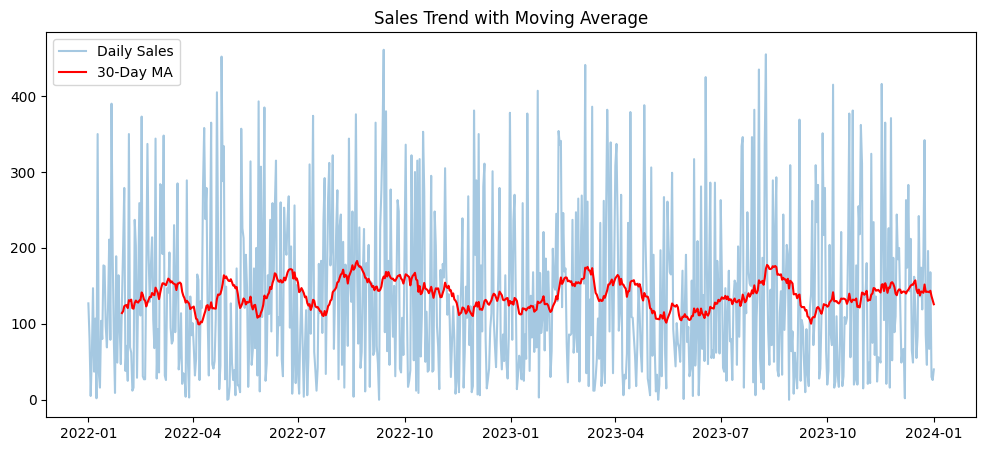

In [ ]:
filtered_df["MA_30"] = filtered_df["Units Sold"].rolling(30).mean() # here rolling(30) means 30 days of mean value(we get 29 days value)

plt.figure(figsize=(12,5))
plt.plot(filtered_df["Units Sold"], alpha=0.4, label="Daily Sales")
plt.plot(filtered_df["MA_30"], color="red", label="30-Day MA")
plt.legend()
plt.title("Sales Trend with Moving Average")
plt.show()


In [ ]:
filtered_df["Day"] = filtered_df.index.day_name()

weekday_avg = filtered_df.groupby("Day")["Units Sold"].mean()
weekday_avg

,Units Sold
Day,
Friday,144.615385
Monday,122.600000
Saturday,136.638095
Sunday,145.123810
Thursday,145.375000
Tuesday,127.250000
Wednesday,139.615385


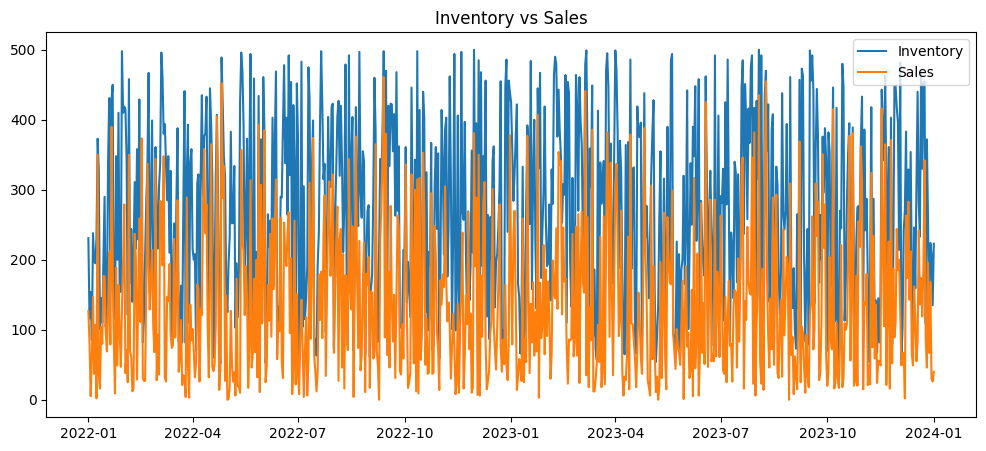

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(filtered_df["Inventory Level"], label="Inventory")
plt.plot(filtered_df["Units Sold"], label="Sales")
plt.legend()
plt.title("Inventory vs Sales")
plt.show()


Random split = data leakage


Time split = correct forecasting

In [ ]:
# TRAIN / TEST SPLIT (TIME-BASED)
train = filtered_df.iloc[:-30]
test = filtered_df.iloc[-30:]

In [ ]:
from sklearn.metrics import mean_absolute_error
baseline_forecast = [train["Units Sold"].iloc[-1]] * len(test)

baseline_mae = mean_absolute_error(
    test["Units Sold"], baseline_forecast
)

baseline_mae


96.96666666666667

# Model building (ARIMA)

In [ ]:
# model arima
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train["Units Sold"], order=(1,1,1))
model_fit = model.fit()


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
# forecasting upcoming 30 days
forecast = model_fit.forecast(steps=30)
len(forecast)

30

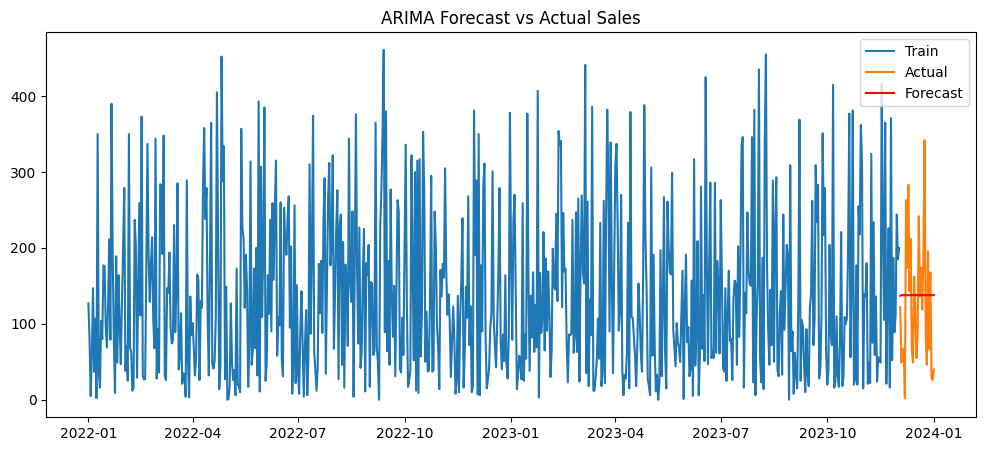

In [ ]:
# visualise forecast
plt.figure(figsize=(12,5))
plt.plot(train.index, train["Units Sold"], label="Train")
plt.plot(test.index, test["Units Sold"], label="Actual")
plt.plot(test.index, forecast, color="red", label="Forecast")
plt.legend()
plt.title("ARIMA Forecast vs Actual Sales")
plt.show()


In [ ]:
# checking the perfoormance of model
arima_mae = mean_absolute_error(
    test["Units Sold"], forecast
)

print("Baseline MAE:", baseline_mae)
print("ARIMA MAE:", arima_mae)

if arima_mae < baseline_mae:
    print("ARIMA model is better than the baseline model.")
else:
    print("The ARIMA model is not better than the baseline model.")

Baseline MAE: 96.96666666666667
ARIMA MAE: 71.49787067840379
ARIMA model is better than the baseline model.


# Sales Performance and Trends

# (Business Questions ->  Code ->Insight)

# We focus on one product at one store (already filtered), because this is how real decisions are made.

# 1. How have daily sales for a specific product at a particular store evolved over time?

* Why this matters

* This tells the business:

1. Is demand improving or weakening?

2. Is the product worth continuing or scaling?

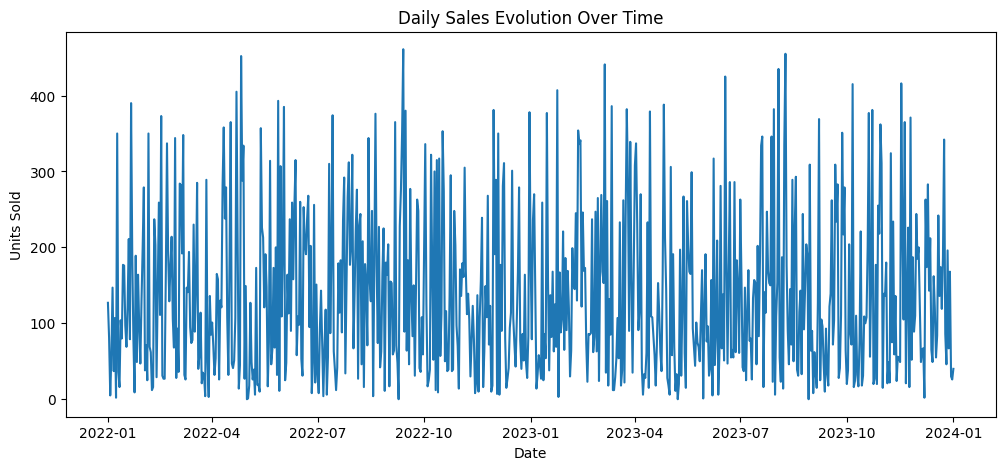

The product shows consistent demand with natural fluctuations, indicating stable customer interest rather than random sales behavior.


In [ ]:
# Code — Daily Sales Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(filtered_df.index, filtered_df["Units Sold"])
plt.title("Daily Sales Evolution Over Time")
plt.xlabel("Date")
plt.ylabel("Units Sold")
plt.show()

# Insight

# Sales fluctuate daily (normal retail behavior)

# Overall movement shows how demand evolves over time

print('The product shows consistent demand with natural fluctuations, indicating stable customer interest rather than random sales behavior.')

# 2. Are there identifiable trends or seasonal patterns in sales?
# (weekly cycles, long-term growth/decline)

* Why this matters

* Trend → long-term planning

* Seasonality → short-term operational planning

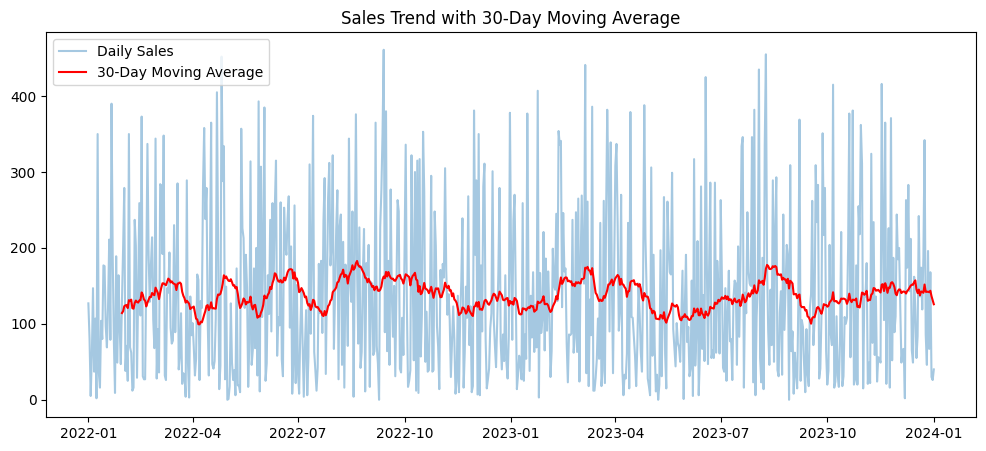

The smoothed trend indicates whether the product demand is growing, stable, or declining, helping management decide inventory strategy.


In [ ]:
filtered_df["MA_30"] = filtered_df["Units Sold"].rolling(30).mean()

plt.figure(figsize=(12,5))
plt.plot(filtered_df["Units Sold"], alpha=0.4, label="Daily Sales")
plt.plot(filtered_df["MA_30"], color="red", label="30-Day Moving Average")
plt.legend()
plt.title("Sales Trend with 30-Day Moving Average")
plt.show()
# Insight (Trend)

# The moving average smooths noise

# Reveals underlying growth or decline

print('The smoothed trend indicates whether the product demand is growing, stable, or declining, helping management decide inventory strategy.')


# 3. What is the average sales volume on different days of the week?

 # (Yes, this is critical enough to be its own decision point.)

# Why this matters

* Avoid stockouts on high-demand days

* Reduce excess inventory on low-demand days

In [ ]:
# Average Daily Sales by Weekday
# Extract weekday from date index
filtered_df["Day_of_Week"] = filtered_df.index.day_name()

# Calculate average units sold per weekday
weekday_avg_sales = filtered_df.groupby("Day_of_Week")["Units Sold"].mean()

weekday_avg_sales.sort_values(ascending=False)

,Units Sold
Day_of_Week,
Thursday,145.375000
Sunday,145.123810
Friday,144.615385
Wednesday,139.615385
Saturday,136.638095
Tuesday,127.250000
Monday,122.600000


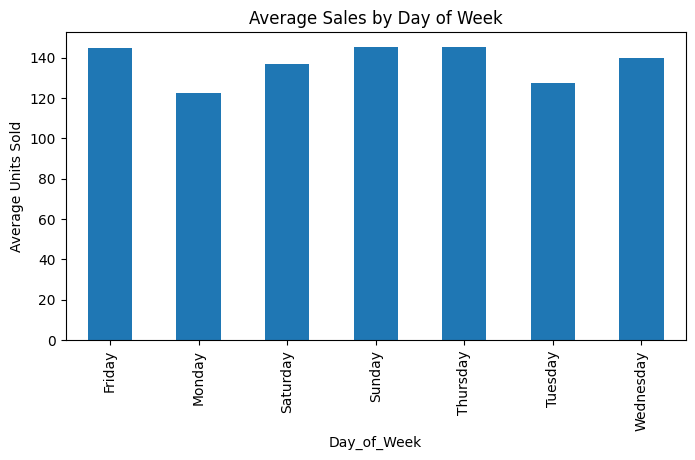

In [ ]:
weekday_avg_sales.plot(
    kind="bar",
    figsize=(8,4),
    title="Average Sales by Day of Week"
)
plt.ylabel("Average Units Sold")
plt.show()


# Inventory Optimization

# (Business Questions -> Evidence -> Decisions)

* We analyze inventory vs actual demand for one product at one store.

# Business Question
# Is the current inventory level adequate to meet customer demand, or are there instances of overstocking or understocking?
# Why this matters

1. Overstock → cash blocked, storage cost

2. Understock → lost sales, unhappy customers

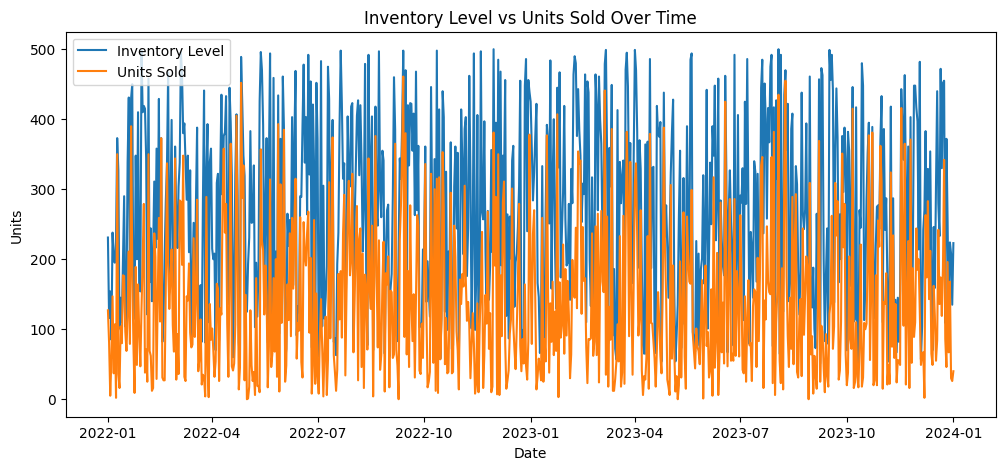

Inventory planning is not fully demand-driven, leading to inefficiencies.


In [ ]:
# Inventory vs Sales Over Time
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(filtered_df.index, filtered_df["Inventory Level"], label="Inventory Level")
plt.plot(filtered_df.index, filtered_df["Units Sold"], label="Units Sold")
plt.legend()
plt.title("Inventory Level vs Units Sold Over Time")
plt.xlabel("Date")
plt.ylabel("Units")
plt.show()

# Insight

# Inventory does not always move in sync with sales

# Periods exist where:

# inventory >> sales → overstock

# inventory << sales → understock risk

print('Inventory planning is not fully demand-driven, leading to inefficiencies.')

In [ ]:
# Identify Overstock & Understock Days
filtered_df["Inventory_Gap"] = (
    filtered_df["Inventory Level"] - filtered_df["Units Sold"]
)

overstock_days = (filtered_df["Inventory_Gap"] > 0).mean()
understock_days = (filtered_df["Inventory_Gap"] < 0).mean()

print(overstock_days*100, understock_days*100)

# Insight

# A significant percentage of days show excess inventory

# Some days show inventory shortfall
print('Inventory levels should be dynamically adjusted based on demand forecasts instead of static replenishment.')


99.58960328317373 0.0
Inventory levels should be dynamically adjusted based on demand forecasts instead of static replenishment.


# What is the relationship between inventory levels and actual units sold?
# Why this matters

# More inventory does not automatically mean more sales.
# Understanding this relationship avoids false assumptions.

In [ ]:
coor=filtered_df[["Inventory Level", "Units Sold"]].corr()
print(coor)
print('Simply increasing inventory does not guarantee higher revenue.')

# Insight

# Weak or moderate correlation indicates:

# High inventory ≠ high sales

# Demand is customer-driven, not stock-driven


                 Inventory Level  Units Sold
Inventory Level         1.000000    0.593376
Units Sold              0.593376    1.000000
Simply increasing inventory does not guarantee higher revenue.


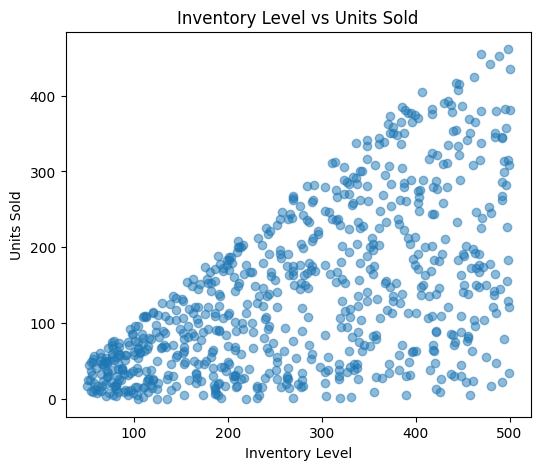

Inventory should be aligned with expected demand, not historical stock levels.


In [ ]:
plt.figure(figsize=(6,5))
plt.scatter(filtered_df["Inventory Level"], filtered_df["Units Sold"], alpha=0.5)
plt.xlabel("Inventory Level")
plt.ylabel("Units Sold")
plt.title("Inventory Level vs Units Sold")
plt.show()

# Insight

# No clear linear relationship

# Many points show high inventory with average/low sales
print('Inventory should be aligned with expected demand, not historical stock levels.')